# xcube CMEMS Data Store

This notebook provides a walk-through demonstrating how to use xcube and the xcube-cmems plugin to read and explore data from the CMEMS API.

In order to run this notebook you need to install the xcube_cmems plugin. You may do so by executing the following line in your terminal:

$  conda install -c conda-forge xcube-cmems

Or you can install the xcube_cmems plugin from sources by following the instructions on https://github.com/xcube-dev/xcube-cmems.

set CMEMS_USERNAME and CMEMS_PASSWORD as environment variables If you do not have cmems user yet, you can register for an account


In [1]:
from xcube_cmems.store import CmemsDataStore

In [2]:
import xcube_cmems

In [3]:
xcube_cmems.__version__

'0.3.0.dev0'

In [4]:
cmems_store =  CmemsDataStore()

INFO - 2024-03-28T11:40:17Z - Credentials file stored in /home/tejas/bc/projects/xcube-cmems/examples/notebooks/.copernicusmarine-credentials.


Get all the data ids in cmems datastore

In [5]:
list(cmems_store.get_data_ids())

Fetching catalog: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:15<00:00,  3.86s/it]


['antarctic_omi_si_extent',
 'antarctic_omi_si_extent_obs',
 'cmems_mod_arc_bgc_anfc_ecosmo_P1D-m',
 'cmems_mod_arc_bgc_anfc_ecosmo_P1M-m',
 'cmems_mod_arc_phy_anfc_6km_detided_P1D-m',
 'cmems_mod_arc_phy_anfc_6km_detided_P1M-m',
 'cmems_mod_arc_phy_anfc_6km_detided_PT1H-i',
 'cmems_mod_arc_phy_anfc_6km_detided_PT6H-m',
 'cmems_mod_arc_phy_anfc_nextsim_P1M-m',
 'cmems_mod_arc_phy_anfc_nextsim_hm',
 'dataset-topaz6-arc-15min-3km-be',
 'cmems_mod_arc_phy_anfc_topaz4_P1M-m',
 'dataset-topaz4-arc-1hr-myoceanv2-be',
 'dataset-topaz4-arc-myoceanv2-be',
 'dataset-wam-arctic-1hr3km-be',
 'cmems_mod_arc_bgc_my_ecosmo_P1D-m',
 'cmems_mod_arc_bgc_my_ecosmo_P1M',
 'cmems_mod_arc_bgc_my_ecosmo_P1Y',
 'cmems_mod_arc_phy_my_topaz4_P1D-m',
 'cmems_mod_arc_phy_my_topaz4_P1M',
 'cmems_mod_arc_phy_my_topaz4_P1Y',
 'cmems_mod_arc_wav_my_3km-climatology_P1M-m',
 'cmems_mod_arc_wav_my_3km_PT1H-i',
 'arctic_omi_si_transport_nordicseas',
 'arctic_omi_si_extent',
 'arctic_omi_si_extent_obs',
 'arctic_omi_temps

Get more info about a specific dataset.

In [7]:
cmems_store.describe_data("dataset-duacs-nrt-europe-merged-allsat-phy-l4")

Fetching catalog: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:15<00:00,  3.76s/it]

INFO - 2024-03-28T11:41:50Z - Dataset version was not specified, the latest one was selected: "202112"
INFO - 2024-03-28T11:41:50Z - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-03-28T11:41:52Z - Service was not specified, the default one was selected: "arco-geo-series"


/home/tejas/micromamba/envs/xcube-cmems/lib/python3.12/site-packages/xcube/core/store/descriptor.py:244: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self.dims = dict(dims) if dims else None


Which parameters must be passsed or are available to open the dataset?

In [8]:
cmems_store.get_open_data_params_schema("dataset-duacs-nrt-europe-merged-allsat-phy-l4")

The dataset can be opened by giving variables_names, time_range and bbox as params, but none of them are mandatory.

In [9]:
dataset = cmems_store.open_data(
    "dataset-duacs-nrt-europe-merged-allsat-phy-l4",
    variable_names=["adt"],
    bbox=[9, 53, 20, 62],
    time_range=("2024-01-01", "2024-01-05"),
)
dataset

Fetching catalog: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:15<00:00,  3.99s/it]

INFO - 2024-03-28T11:42:36Z - Dataset version was not specified, the latest one was selected: "202112"
INFO - 2024-03-28T11:42:36Z - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-03-28T11:42:37Z - Service was not specified, the default one was selected: "arco-geo-series"


<xarray.Dataset> Size: 254kB
Dimensions:    (time: 5, latitude: 72, longitude: 88)
Coordinates:
  * latitude   (latitude) float32 288B 53.06 53.19 53.31 ... 61.69 61.81 61.94
  * longitude  (longitude) float32 352B 9.062 9.188 9.312 ... 19.69 19.81 19.94
  * time       (time) datetime64[ns] 40B 2024-01-01 2024-01-02 ... 2024-01-05
Data variables:
    adt        (time, latitude, longitude) float64 253kB ...
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Near-Real-Time Level-4 sea ...
    time_coverage_duration:          P1D
    time_coverage_end:               2019-12-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2019-11-30T12:00:00Z
    title:                           NRT merged all satellites European Seas ...

In [10]:
dataset.adt

<xarray.DataArray 'adt' (time: 5, latitude: 72, longitude: 88)> Size: 253kB
[31680 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float32 288B 53.06 53.19 53.31 ... 61.69 61.81 61.94
  * longitude  (longitude) float32 352B 9.062 9.188 9.312 ... 19.69 19.81 19.94
  * time       (time) datetime64[ns] 40B 2024-01-01 2024-01-02 ... 2024-01-05
Attributes:
    comment:        The absolute dynamic topography is the sea surface height...
    grid_mapping:   crs
    long_name:      Absolute dynamic topography
    standard_name:  sea_surface_height_above_geoid
    units:          m

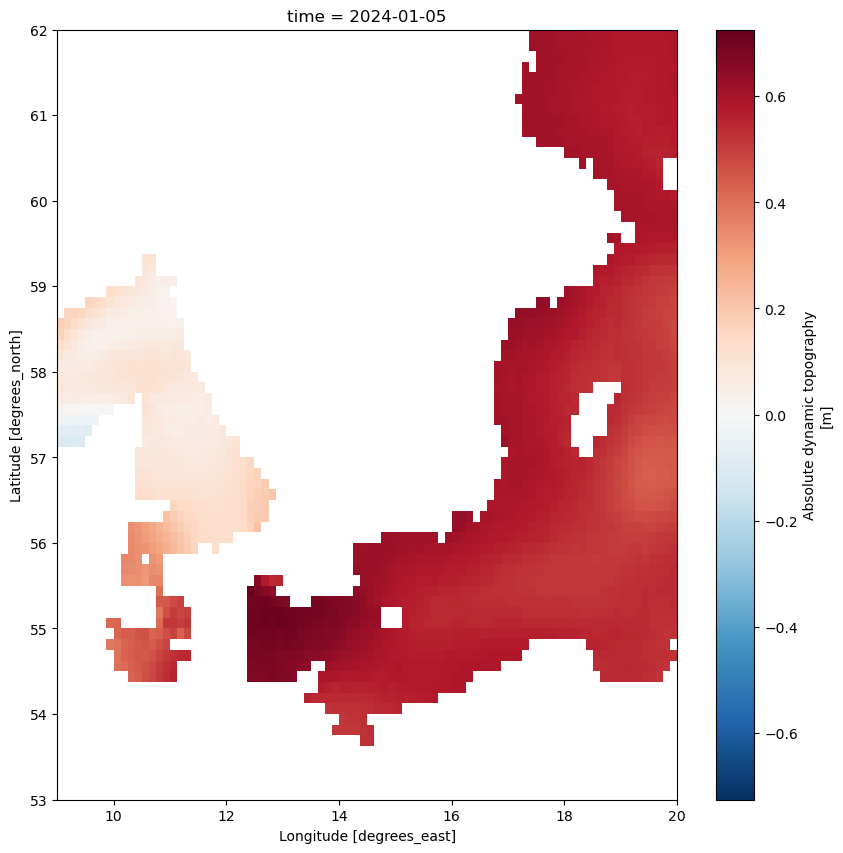

In [11]:
dataset.adt.isel(time=-1).plot(figsize=(10, 10))